### **Importación de librerías necesarias**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier

### **Lectura de datos**

In [4]:
data = pd.read_csv('datasets/PS_20174392719_1491204439457_log.csv')


### **Pre-visualización de datos**

In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### **Visualización y EDA de datos**

In [53]:
data['type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6362620 entries, 0 to 6362619
Series name: type
Non-Null Count    Dtype 
--------------    ----- 
6362620 non-null  object
dtypes: object(1)
memory usage: 48.5+ MB


In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


#### **Identificar y manejar valores faltantes:**

In [54]:
data.isnull().sum()
# data = data.dropna()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
currencyOrig      0
currencyDest      0
dtype: int64

In [12]:
len(data)-len(data.drop_duplicates())


0

In [56]:
data['nameOrig'].value_counts().head(15)

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
C1832548028    3
C1976208114    3
C2051359467    3
C1065307291    3
C1530544995    3
Name: count, dtype: int64

In [57]:
data['nameDest'].value_counts().head(15)

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
C977993101      96
C97730845       96
C392292416      95
C1899073220     92
C306206744      91
Name: count, dtype: int64

### Filtrar datos irrelevantes o incorrectos.

In [17]:
count = len(data)
print("Porcentaje de Valores para la Columna 'isFraud'")
print(f"\t No Fraude(0) = {(data['isFraud'].value_counts().get(0)/ count) * 100}% = {(data['isFraud'].value_counts().get(0))}")
print(f"\t Es Fraude(1) = {(data['isFraud'].value_counts().get(1)/ count) * 100}% = {(data['isFraud'].value_counts().get(1))}")
print("")
print("Porcentaje de Valores para la Columna 'isFlaggedFraud'")
print(f"\t No Marcado Fraude(0) = {(data['isFlaggedFraud'].value_counts().get(0)/ count) * 100}% = {(data['isFlaggedFraud'].value_counts().get(0))}")
print(f"\t Es Marcado Fraude(1) = {(data['isFlaggedFraud'].value_counts().get(1)/ count) * 100}% = {(data['isFlaggedFraud'].value_counts().get(1))}")


Porcentaje de Valores para la Columna 'isFraud'
	 No Fraude(0) = 99.87091795518198% = 6354407
	 Es Fraude(1) = 0.12908204481801522% = 8213

Porcentaje de Valores para la Columna 'isFlaggedFraud'
	 No Marcado Fraude(0) = 99.99974853126542% = 6362604
	 Es Marcado Fraude(1) = 0.000251468734577894% = 16


In [58]:
print("Cantidad total de tipo de transactiones")
print(data['type'].value_counts())
print(f"Total de Datos: {len(data)}")

Cantidad total de tipo de transactiones
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
Total de Datos: 6362620


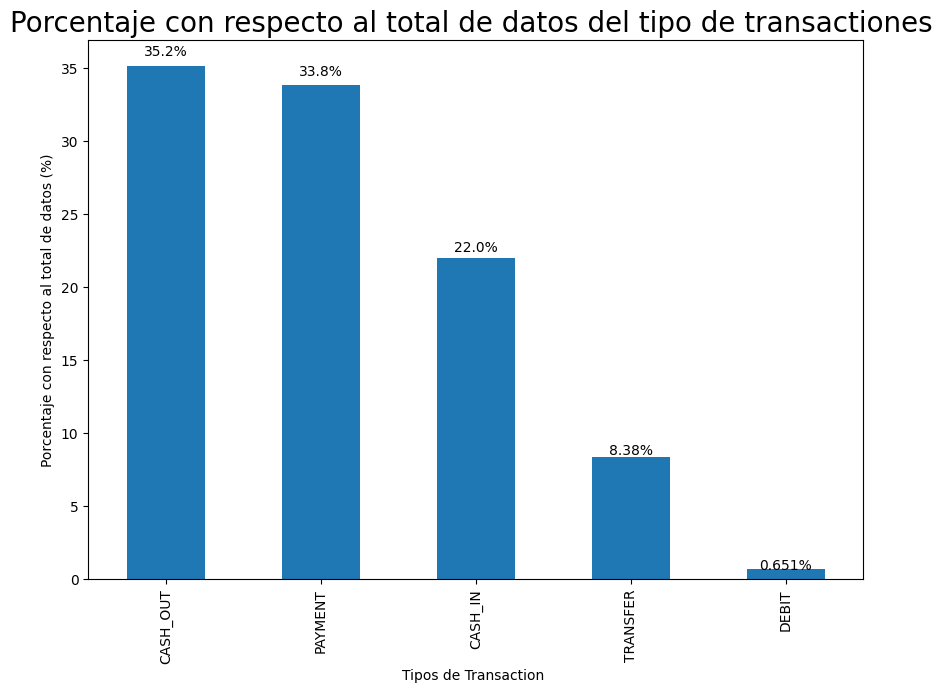

In [59]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (10, 7)

ax = (data['type'].value_counts()/len(data)*100).plot.bar()
plt.title('Porcentaje con respecto al total de datos del tipo de transactiones ', fontsize = 20)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()  
    ax.annotate(f'{height:.3}%', (x + width/2, y + height*1.02), ha='center')
plt.xlabel('Tipos de Transaction ')
plt.ylabel('Porcentaje con respecto al total de datos (%)')
plt.show()

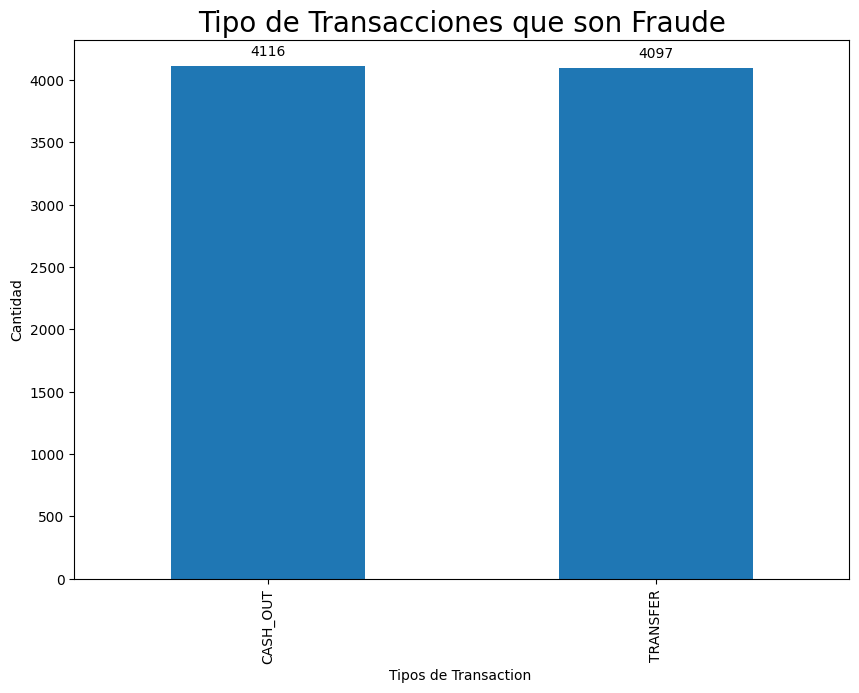

In [61]:
plt.rcParams['figure.figsize'] = (10, 7)

ax = (data.loc[(data['isFraud'] == 1)]['type'].value_counts()).plot.bar()
plt.title('Tipo de Transacciones que son Fraude', fontsize = 20)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()  
    ax.annotate(f'{height:}', (x + width/2, y + height*1.02), ha='center')
plt.xlabel('Tipos de Transaction ')
plt.ylabel('Cantidad')
plt.show()

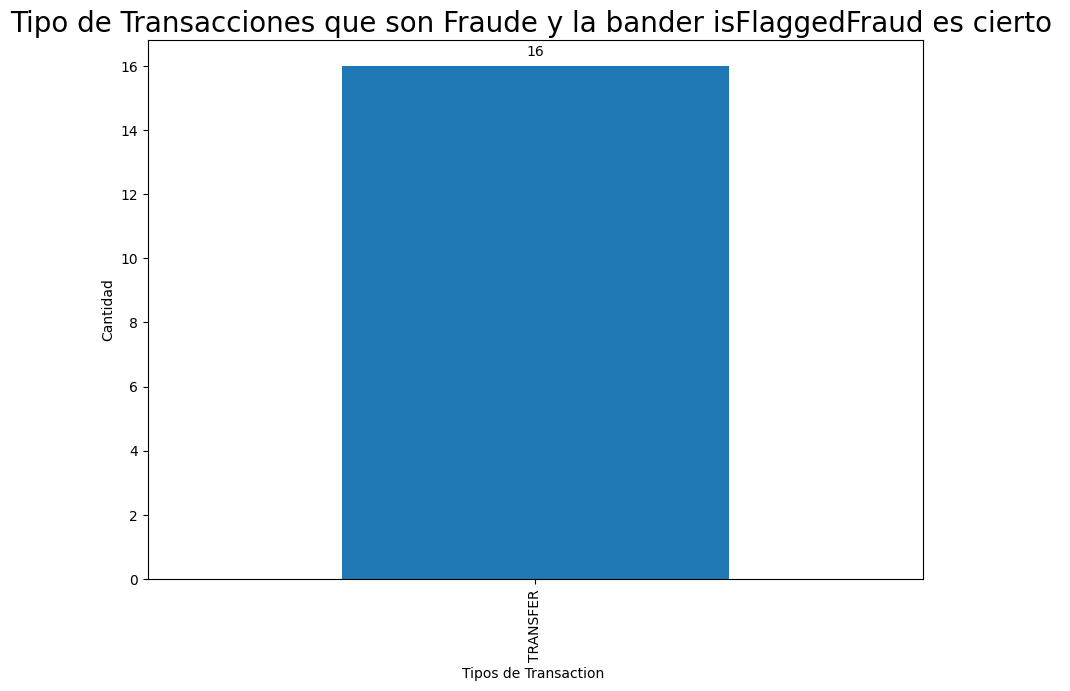

In [62]:
plt.rcParams['figure.figsize'] = (10, 7)

ax = (data.loc[(data['isFraud'] == 1) & (data['isFlaggedFraud'] == 1)]['type'].value_counts()).plot.bar()
plt.title('Tipo de Transacciones que son Fraude y la bander isFlaggedFraud es cierto ', fontsize = 20)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()  
    ax.annotate(f'{height:}', (x + width/2, y + height*1.02), ha='center')
plt.xlabel('Tipos de Transaction ')
plt.ylabel('Cantidad')
plt.show()

In [63]:
confusion_matrix = pd.crosstab(data['isFraud'], data['isFlaggedFraud'], rownames=['isFraud'], colnames=['isFlaggedFraud'])
print("Matriz de Confución:")
print(confusion_matrix) 



Matriz de Confución:
isFlaggedFraud        0   1
isFraud                    
0               6354407   0
1                  8197  16


In [64]:
print("Cantidades maximas y minimas para Fraudes marcados como Fraudes")
print("Transaction Maxima :", data.loc[(data.isFraud == 1) & (data.isFlaggedFraud == 1)].amount.max())
print("Transaction Minima :", data.loc[(data.isFraud == 1) & (data.isFlaggedFraud == 1)].amount.min())
print("")
print("Cantidades maximas y minimas para Fraudes no marcados como Fraudes")
print("Transaction Maxima :", data.loc[(data.isFraud == 1) & (data.isFlaggedFraud == 0)].amount.max())
print("Transaction Minima :", data.loc[(data.isFraud == 1) & (data.isFlaggedFraud == 0)].amount.min())


Cantidades maximas y minimas para Fraudes marcados como Fraudes
Transaction Maxima : 10000000.0
Transaction Minima : 353874.22

Cantidades maximas y minimas para Fraudes no marcados como Fraudes
Transaction Maxima : 10000000.0
Transaction Minima : 0.0


### Agregación de Columnas para propositos de demostración

In [ ]:
currency_abbreviations = ['USD', 'EUR', 'GBP', 'JPY', 'AUD', 'CAD', 'CHF', 'CNY', 'INR', 'BRL', 'MXN', 'ZAR', 'RUB', 'TRY', 'SGD']
data['currencyOrig'] = list(np.random.choice(currency_abbreviations, len(data)))
data['currencyDest'] = list(np.random.choice(currency_abbreviations, len(data)))